(827, 1300, 3)
Es una placa, hora de buscar la ultima letra
<class 'PIL.Image.Image'>


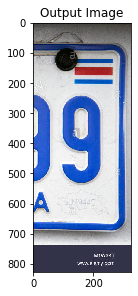

8


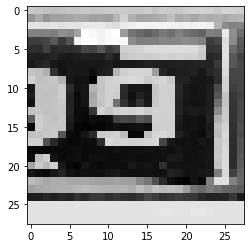

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import cv2
import pickle
import pandas as pd
import json
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

from PIL import Image
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

IMG_SIZE=128

def load_first_model():
    model = Sequential()

    pickle_in = open("Features_output.pickle","rb")
    X = pickle.load(pickle_in)
    model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

    model.add(Dense(64))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    checkpoint_path = "/home/alejandro/placas/cp.ckpt"

    model.load_weights(checkpoint_path)
    return model

def load_second_model():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    # Reshaping the array to 4-dims so that it can work with the Keras API
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    # Making sure that the values are float so that we can get decimal points after division
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # Normalizing the RGB codes by dividing it to the max RGB value.
    x_train /= 255
    x_test /= 255
    # Creating a Sequential Model and adding the layers
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation=tf.nn.softmax))
    checkpoint_path = "/home/alejandro/Verny_Model/Model_Verny1.ckpt"

    model.load_weights(checkpoint_path)
    return model

def get_image_in_format(filepath):      
    im = np.array(Image.open(filepath))
    print(im.shape)
    new_array = cv2.resize(im, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

def get_image(filepath):
    im = np.array(Image.open(filepath))
    return im
def get_second_model_evaluation(image_original,model):
    img_rows, img_cols = 28, 28
    image_original_gray = rgb2gray(image_original)
    image_original_gray_res = resize(image_original_gray, (28,28))

    #image1 = image_original.reshape(367500, 28, 28,1)
    #prediction = model.predict(r'C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\1.jpg')

    #print(prediction)

    image_index = 3333
    plt.imshow(image_original_gray_res.reshape(28, 28),cmap='Greys')
    pred = model.predict(image_original_gray_res.reshape(1, img_rows, img_cols, 1))
    
    return pred.argmax()
def main():
    first_model=load_first_model()
    second_model=load_second_model()
    #agregar funcionalidad de caputrar imagen.
    #por ahora estamos usando una imagen fija
    plate_image=get_image_in_format('/home/alejandro/placas/prueba10.jpg')
    raw_image=get_image('/home/alejandro/placas/prueba10.jpg')
    prediction_upon_image_captured=first_model.predict(plate_image)
    if prediction_upon_image_captured==0:
        print("Es una placa, hora de buscar la ultima letra")
        #forma burda de recortar la imagen pra obtener la ultima posicion de la placa
        x_point_top = raw_image.shape[1]/8*6
        y_point_top = 0
        x_point_bot = raw_image.shape[1]
        y_point_bot = raw_image.shape[0]
        plateImage = Image.fromarray(raw_image).crop((x_point_top, y_point_top, x_point_bot, y_point_bot))
        fig, ax = plt.subplots(1, 1, constrained_layout=True)
        print(type(plateImage))
        # Set title
        ax.set_title('Output Image')
        # Display the images
        ax.imshow(plateImage)
        plt.show()
        #deberia hacer un llamado al modelo de verny
        plate_number=get_second_model_evaluation(np.asarray(plateImage),second_model)
        print(plate_number)
    else:
        print("No es placa")
       
    
  
if __name__== "__main__":
  main()